In [15]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib widget

In [17]:
J_V_ratios = np.linspace(-0.1,3,100)
N = 5
M = 3
V = 1

states, _ = enumerate_states(N, M)
epsilons = []
normalized_sigmas = []
for J_V_ratio in J_V_ratios:
    ham = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio=0,J_V_ratio=J_V_ratio)
    eigenvalues, eigenvectors = exact_diagonalize(ham)
    sigma_array = []
    for eigenvector in eigenvectors:
        sigma = sigma_ij(3, 4, eigenvector, states, N, M)
        sigma_array += [sigma]
    epsilons += [eigenvalues/N]
    normalized_sigmas += [sigma_array]
    
epsilons = np.array(epsilons)
normalized_sigmas = np.array(normalized_sigmas)

Text(0.5, 0, '$J/|V|$')

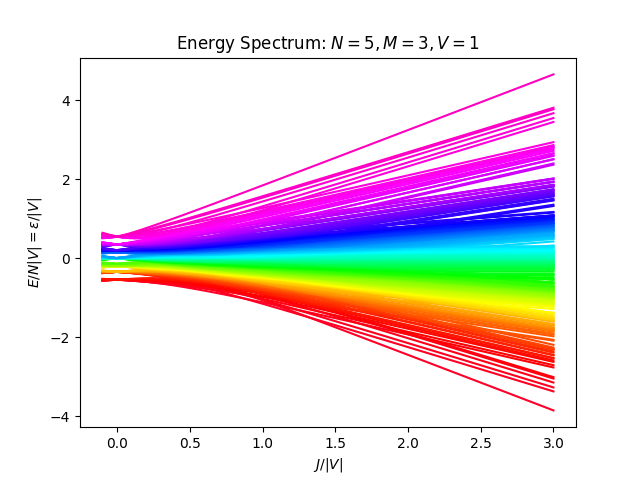

In [18]:
fig, ax = plt.subplots()
colors = get_cmap("gist_rainbow", M**N)
for i in range(M**N):
    ax.plot(J_V_ratios, epsilons[:,i], color = colors(i))

ax.set_title(f"Energy Spectrum: $N = {N}, M = {M}, V = {V}$")
ax.set_ylabel("$E/N|V| = \epsilon/|V|$")
ax.set_xlabel("$J/|V|$")

Text(0.5, 0, '$J/|V|$')

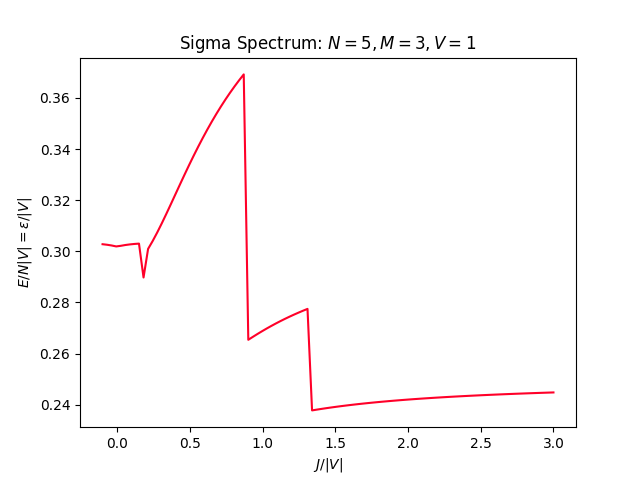

In [42]:
fig, ax = plt.subplots()
colors = get_cmap("gist_rainbow", M**N)
for i in range(1):
    ax.plot(J_V_ratios, normalized_sigmas[:,i]/M, '-', color = colors(i))

ax.set_title(f"Sigma Spectrum: $N = {N}, M = {M}, V = {V}$")
ax.set_ylabel("$E/N|V| = \epsilon/|V|$")
ax.set_xlabel("$J/|V|$")